# Software Testing, Automation and the Job Market - a Data Programming Project

# Table of contents
1. [ Research Questions, Project Limitations and Motivation ](#research_questions)

   1.1 [Research Area](#area)
   
   1.2 [Research Questions](#questions)
   
   1.3 [Future Work / Project Limitations](#limitations)
   
   1.4 [Motivation](#motivation)
   
   1.5 [Previous Exploration of the Topic](#previous_exploration)
   
   1.6 [Acquisition of the Data Set and Choice of Data Source](#data_acq)
   
   1.7 [Ethical Implications](#ethical_implications)
   
   
2. [Web Scraping](#web_scraping)

   2.1 [The Initial ScraperHelpers.py Script](#initial_code)
   
   2.2 [The Final ScraperHelpers Script ](#final_code)
   
   2.3 [Full Code](#script)
   
   2.4 [Sampler Code to Demonstrate the Web Scraper Code](#sampler_code)
   
   2.5 [Lessons Learnt from Web Scraping](#scraping_lessons_learnt)
   

3. [Cleaning Up Data](#clean_up_data)
    
   3.1 [Job Snippets Data Set: Data Cleaning Problem](#job_snippets)
   
   3.2 [Lessons Learnt from Data Cleaning](#clean_up_data_lessons_learnt)
   

4. [Natural Language Processing Analysis Methods: Frequency of Job Titles](#nlp)
    
    4.1 [Plotting the Twenty Most Frequent Job Titles](#plotting)
    
    4.2 [Advantages and Drawbacks to Plotting](#draw_back_plotting)
    
    4.3 [Job Titles as a WordCloud](#wordcloud)
    
    4.4 [Advantages and Drawbacks to the Word Cloud](#draw_back_word_cloud)
    
    4.5 [Most Frequent Job Titles Calculated Using the Counter Class](#counter_class)
    
    4.6 [Advantages and Drawbacks to the Counting Library](#draw_back_word_count)
    
    4.7 [Conclusions Drawn from the NLP Analysis](#nlp_conclusions)  
    
    
5. [Plotting the Frequency of Skills and Programming Languages](#programming_lang_and_skills)
    
    5.1 [Plotting the Frequency of Programming Languages](#programming_lang)

### Research Questions, Project Limitations and Motivation <a id="research_questions"></a>

#### Research Area  <a id="area"></a>
The goal of this project is to analyse a given dataset from a large job board in regards to software testing roles with the emphasis of the analysis placed on what the most sought for skills are in order to shed some light on the ongoing debate on whether automation testing is going to replace manual testing (e.g __[Can Manual Testing Be Completely Replaced by Automation Testing?](https://blog.qasource.com/resources/can-manual-testing-be-completely-replaced-by-automation-testing)__). 

#### Research Questions  <a id="questions"></a>
More specifically, this project aims to answer the following questions:

<ul>
    <p> <li>What are the most popular skills required for prospective software testers? </li> </p>
    <p> <li>Which programming languages are the most popular for test automation? </li> </p>
</ul>

One caveat that has to be considered; however, is that the research questions may change depending on the final data set and that the answers to these questions may be incoplete, unavailable and limited in terms of depth. However, there is scope to learn from this as discussed in the next section.

#### Future Work / Project Limitations  <a id="limitations"></a>

Some questions that are interesting, but out of scope for this project are listed below:

<ul>
    <p> <li>How many job adverts mention a combination of manual and test automation in their descriptions ? </li> </p>
    <p> <li>How many job descriptions mention training / upskilling? </li> </p>
    <p> <li>How many jobs exclusively focus on either manual or automation? </li></p>
</ul>

The reason why these problems are out of scope is because the data set used in this project is limited in terms of geographical region. Additionally, for the questions mentioned above a much larger dataset would be required in order to come up with a sensible analysis. Indeed -- even with a larger dataset -- the work would still be limited to the English language, excluding analysis from countries such as China or South Korea.

Of course, one could limit the project to a specific language or region, but this kind of project still requires a large dataset that takes into consideration where the jobs are located (rural areas may have less to offer than urban ones), what time period they were posted in, what seniority level they address and which area of testing they are focused on (e.g. performance testing). The deeper one dives into the topic, the more likely one is to find irregularities and different demands, which would make it difficult to generalise-- at least without performing some thorough analysis. 

Also, the time required to answer such questions would be important as well: technology is in a constant state of flux, and it would be important to analyse job boards throughout a given period, with the focus placed on the areas where change is happening the most and keeping an eye on how quickly some trends are growing.

Furthermore, my experience / abilities in data acquisition are still very much at novice level, which prevents me from doing the complex and thorough research this project deserves. 
 

#### Motivation  <a id="motivation"></a>
The motivation behind this specific area of research stems from my job as a QA where I have worked with both automation and manual testing tools. While I personally believe that a good software tester has skills in __[both white box and black box testing](https://www.geeksforgeeks.org/differences-between-black-box-testing-vs-white-box-testing/)__, I am keen to find out what philosophy the employment market is leaning towards with data from job boards serving as a good basis for me to embrace this topic on a practical level.

Moreover, I used to work for a software house that focused on gathering data for recruitment companies. During that time, I used to dabble a bit in job board searches in order to garner what the expectations / trends for software testers were. In fact, some of the observations related to the limits of the project come from direct exposure related to analysing data of such a nature. 
 
#### Previous Exploration of the Topic   <a id="previous_exploration"></a>
While __[many articles ](https://www.infoq.com/test-automation/articles/)__ have been and continue to be published on the subject already, I have not seen any students discussing this topic in our university slack channel or express much interest in software testing otherwise. Of interest; however, are the __[annual surveys carried out by Practitest](https://www.practitest.com/qa-learningcenter/webinars/learn-from-2021-state-of-testing/)__ which analyses software testing trends and provides information on them. It showcases the versatility and importance of testing, especially with the rise of AI and development teams recognising the constant need for quality assurance.


Outside of the internet, there are __[also many workshops and courses available on automation testing](https://www.theknowledgeacademy.com/courses/automation-and-penetration-testing/fundamentals-of-test-automation-/bristol/)__ with their main focus placed on upskilling manual testers, which proves how important automation is as a skill set for both budding and experienced software testers alike.


#### Acquisition of the Data Set and Choice of Data Source  <a id="data_acq"></a>
The datasets that were considered for this project came from job boards that have public APIs available for web crawling purposes.. In particular, the site 
__[The Programmable Web](https://www.programmableweb.com/news/top-10-jobs-apis-2021/brief/2021/06/30)__ proved to be a valuable source for finding APIs that were free and did not require any prior set up. 

Due to the fact that Indeed is the biggest job site aggregator, I decided to use it for my project, even though I would have preferred using a smaller site that provided guidance on how to use its API. However, I wanted to ensure that I would have sufficient data to perform some preliminary analysis, which smaller job site aggregators would not necessarily have been able to offer.

#### Ethical Implications  <a id="ethical_implications"></a>

Scraping data as _[the article ](https://www.empiricaldata.org/dataladyblog/a-guide-to-ethical-web-scraping)_ to ethical web scraping indicates can have ethical implications when dealing with sensitive data -- such as someone’s health records, for example. These implications are important to consider, especially because malicious agents could use such sensitive information for criminal purposes -- such as a fraud. Therefore, it is important to respect the owners of the provided API by asking for permission to use their data and not avoid scraping their site for it too often.

While I have not asked Indeed for explicit permission, I consider my use to be ethical since Indeed is an aggregator that collects job listings from other sites -- this information is public and intended to be shared with other job seekers and recruiters alike. There is no sensitive information in the job listings, other than the job being offered, the requirements being sought and some general information about the company itself.

While the data could be used to create a competitive aggregator site, the data required for such a task would have to be massive and is outside of this project’s scope, both in terms of my profesional/ programming experience and budget. Additionally, it should be noted that I am not interested in using the data for commercial purposes, but to satisfy the research questions outlined in this report. 

As such, while the data shall be easily available within this Notebook, there is no intention to use the said data beyonds its purpose of analysing the job market trends for software testers in the UK area, In regards to the frequency of the scraping, I expect to scrape the website a couple of times to gather the data I wish to have, thus avoiding any unnecessary overloading of Indeed’s services.

### Web Scraping <a id="web_scraping"></a>

The purpose of this section is to highlight how the chosen data sets were scraped, with the code and any further comments documented below. 

#### The Initial ScraperHelpers.py Script <a id="initial_code"></a>

Before setting out to do a more thorough scraping of the data, I wanted to play around with the basics of it, which is why I wrote two scripts that dealt with web crawling  -- <i> scraperHelpers.py </i> and <i>main.py </i>. The former contains functions which help to scrape data from a given url, while the latter calls upon these methods in order to produce a txt file containing some relevant data.

```python
from bs4 import BeautifulSoup
import requests
from typing import List

```

The script uses BeautifulSoup in order to parse web scraped data into a HTML file, which can then be further analysed and processed. Also, the request library is utilised in order to get data from a given url. Both libraries  were chosen because of their ease of use. 

```python

def retrieve_data_as_text(url: str) -> str:
    """
    Retrieves data from a url
    :param url:
    :return: data in form of a text
    """
    return requests.get(url, HEADERS).text

```
The <i>retrieve_data_as_text</i> method pulls out the text from the job advert which is good for testing purposes as print() can be called upon in order to verify that the correct data is being collected. The <i>retrieve_data_as_text</i> method is also reused in the <i>parse_data_into_html_ </i> method which is called in the main.py script.  

```python

def parse_data_into_html(url: str) -> BeautifulSoup:
    """
    Retrieves data in html format
    :param url: the url in string format
    :return: data parsed into HTML
    """
    data = retrieve_data_as_text(url)
    soup = BeautifulSoup(data, 'html.parser')
    return soup
```

The <i>parse_data_into_html </i> method retrieves the scraped web data as text and then – using the BeautifulSoup object – parses it into a HTML file. This file serves as the basis for all further processing and analysis.

```python

def find_jobs_by_header_title(scraped_data: BeautifulSoup) -> List:
    """
    Finds jobs by header title
    :param scraped_data:
    :param scraped_data: the data to be retrieved
    :return: a list of job titles
    """
    jobs = []
    # code credit for text splitting:
    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
    for item in scraped_data.find_all("h2", class_="jobTitle"):
        data_str = "" + item.get_text()
        jobs.append(data_str.split("\n"))
    return jobs
    
```
The <i> find_jobs_by_header_title </i> method lists all the data that falls under the category of job titles and appends them to a list of job titles. This list is then used as input in the <i>save_jobs_as_txt </i> method below in order to create a text file. 

```python

def save_jobs_as_txt(jobs: List):
    """
    Saves job titles into a text file
    :param jobs: a list of jobs
    :return: returns a txt file containing job titles
    """
    with open('job_titles.txt', 'w') as f:
        f.write("\n".join(str(job) for job in jobs))

```

The methods mentioned above are called from the main script as shown below. 

```python

# !/usr/bin/python
# !python
from scraperHelpers import *

URL = 'https://uk.indeed.com/Remote-QA-jobs'

scraped_data = parse_data_into_html(URL)
jobs = find_jobs_by_header_title(scraped_data)
save_jobs_as_txt(jobs)

```

#### The Final ScraperHelpers Script <a id="final_code"></a>

As with the previous code examples, these code samples were taken from the scripts written in PyCharm -- this was done in order to save time and focus on having the data ready to play with for future analysis. The two functions below are an extension to the ones depicted above. The full code is provided in the next section of this document. 

```python

#!/usr/bin/python
# !python
from bs4 import BeautifulSoup
import pandas as pd
import requests
from typing import List

# global variables
PAGE_COUNT_ITR = 250
HEADERS = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"}

def retrieve_pages_as_text() -> List:
    """
    Scrapes pages in the form of text
    :return: Returns a list of retrieved pages in the form of text
    """
    data_list = []
    page_count = 0
    while page_count <= PAGE_COUNT_ITR:
        url = f'https://uk.indeed.com/jobs?q=Remote%20QA&sort=date&start={page_count}'
        data_list.append(retrieve_data_as_text(url))
        page_count += 10
    return data_list
```

The <i>retrieve_pages_as_text</i> method returns a list of page texts. A while loop is used to increment the page count until a specific limit has been reached; the page count itself is added as a parameter to the URL.

```python
def extract_job_descriptions() -> List:
    """
    @Credit for this piece of code goes to:
    https://stackoverflow.com/questions/67504953/
    how-to-get-full-job-descriptions-from-indeed-using-python-and-beautifulsoup
    Any modifications are mine and mine alone

    Retrieve job summaries  from multiple pages
    :return: a list of job descriptions
    """
    job_summaries = []
    api_url = "https://uk.indeed.com/viewjob?viewtype=embedded&jk={job_id}"
    url = "https://uk.indeed.com/jobs?q=Remote%20QA"
    scraped_data = BeautifulSoup(requests.get(url, headers=HEADERS).content, "html.parser")

    for job in scraped_data.select('a[id^="job_"]'):
        job_id = job["id"].split("_")[-1]
        scraped_job_data = BeautifulSoup(requests.get(api_url.format(job_id=job_id),
                                                      headers=HEADERS).content, "html.parser")
        job_description = scraped_job_data.select_one("#jobDescriptionText").get_text(strip=True)
        job_summaries.append(job_description)

    return job_summaries
```   
The <i>extract_job_descriptions</i> method returns a list of job summaries extracted from a single page on Indeed. Headers are used in order to retrieve more than one job id. 

```python
def parse_page_data_into_html() -> List:
    """
    Retrieves page data in html format
    :return: parsed page data as HTML supplied into a list
    """
    data_list = retrieve_pages_as_text()
    soup = []
    for data in data_list:
        soup.append(BeautifulSoup(data, 'html.parser'))
    return soup
```  

```python
def parse_page_data_into_html() -> List:
    """
    Retrieves page data in html format
    :return: parsed page data as HTML supplied into a list
    """
    data_list = retrieve_pages_as_text()
    soup = []
    for data in data_list:
        soup.append(BeautifulSoup(data, 'html.parser'))
    return soup
```   
The <i> parse_page_data_into_html </i> method above returns a list of parsed HTML data which is further used to extract job titles from a given number of pages.

```python

# noinspection PyTypeChecker
def save_summaries_as_csv(extracted_job_titles: List):
    """
    Save the job summaries into a csv file
    :param extracted_job_titles:
    :return: a csv file containing job summaries
    """
    data_frame = pd.DataFrame(extracted_job_titles)
    data_frame.to_csv("job_descriptions.csv")


# noinspection PyTypeChecker
def save_titles_as_csv(extracted_job_titles: List):
    """
    Saves the extracted job titles into a csv file
    :param extracted_job_titles:
    :return: a csv file containing job titles
    """
    data_frame = pd.DataFrame(extracted_job_titles)
    data_frame.to_csv("job_titles.csv")

def find_jobs_by_summary(scraped_data: BeautifulSoup) -> List:
    """
    Finds jobs by the summary
    :param scraped_data:
    :param scraped_data: the data to be retrieved
    :return: a list of job summaries
    """
    jobs = []
    # code credit for text splitting:
    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
    for item in scraped_data.find_all("div", class_="job-snippet"):
        data_str = "" + item.get_text()
        jobs.append(data_str.split("\n"))
    return jobs
```

#### Full Code <a id="script"></a>
The next cell provides the full scripts, commented out where necessary to prevent any errors while running the Juptyer notebook.

In [2]:
# #!/usr/bin/python
# # !python
from bs4 import BeautifulSoup
import pandas as pd
import requests
from typing import List

# global variables
PAGE_COUNT_ITR = 250
HEADERS = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"}


def retrieve_pages_as_text() -> List:
    """
    Scrapes pages in the form of text
    :return: Returns a list of retrieved pages in the form of text
    """
    data_list = []
    page_count = 0
    while page_count <= PAGE_COUNT_ITR:
        url = f'https://uk.indeed.com/jobs?q=Remote%20QA&sort=date&start={page_count}'
        data_list.append(retrieve_data_as_text(url))
        page_count += 10
    return data_list


def extract_job_descriptions() -> List:
    """
    @Credit for this piece of code goes to:
    https://stackoverflow.com/questions/67504953/how-to-get-full-job-descriptions-from-indeed-using-python-and-beautifulsoup
    Any modifications are mine and mine alone

    Retrieve job summaries  from multiple pages
    :return: a list of job descriptions
    """
    job_summaries = []
    api_url = "https://uk.indeed.com/viewjob?viewtype=embedded&jk={job_id}"
    url = "https://uk.indeed.com/jobs?q=Remote%20QA"
    scraped_data = BeautifulSoup(requests.get(url, headers=HEADERS).content, "html.parser")

    for job in scraped_data.select('a[id^="job_"]'):
        job_id = job["id"].split("_")[-1]
        scraped_job_data = BeautifulSoup(requests.get(api_url.format(job_id=job_id),
                                                      headers=HEADERS).content, "html.parser")
        job_description = scraped_job_data.select_one("#jobDescriptionText").get_text(strip=True)
        job_summaries.append(job_description)

    return job_summaries


def find_jobs_by_summary(scraped_data: BeautifulSoup) -> List:
    """
    Finds jobs by the summary
    :param scraped_data:
    :param scraped_data: the data to be retrieved
    :return: a list of job summaries
    """
    jobs = []
    # code credit for text splitting:
    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
    for item in scraped_data.find_all("div", class_="job-snippet"):
        data_str = "" + item.get_text()
        jobs.append(data_str.split("\n"))
    return jobs


def retrieve_data_as_text(url: str) -> str:
    """
    Retrieves data from a url
    :param url:
    :return: data in form of a text
    """
    return requests.get(url, HEADERS).text


def parse_data_into_html(url: str) -> BeautifulSoup:
    """
    Retrieves data in html format
    :param url: the url in string format
    :return: data parsed into HTML
    """
    data = retrieve_data_as_text(url)
    soup = BeautifulSoup(data, 'html.parser')
    return soup


def parse_page_data_into_html() -> List:
    """
    Retrieves page data in html format
    :return: parsed page data as HTML supplied into a list
    """
    data_list = retrieve_pages_as_text()
    soup = []
    for data in data_list:
        soup.append(BeautifulSoup(data, 'html.parser'))
    return soup


def find_jobs_by_header_title(scraped_data: BeautifulSoup) -> List:
    """
    Finds jobs by header title
    :param scraped_data:
    :param scraped_data: the data to be retrieved
    :return: a list of job titles
    """
    jobs = []
    # code credit for text splitting:
    # @ https://www.geeksforgeeks.org/scraping-indeed-job-data-using-python
    for item in scraped_data.find_all("h2", class_="jobTitle"):
        data_str = "" + item.get_text()
        jobs.append(data_str.split("\n"))
    return jobs


def save_jobs_as_txt(jobs: List):
    """
    Saves job titles into a text file
    :param jobs: a list of jobs
    :return: returns a txt file containing job titles
    """
    with open('job_titles.txt', 'w') as f:
        f.write("\n".join(str(job) for job in jobs))


# noinspection PyTypeChecker
def save_summaries_as_csv(extracted_job_titles: List):
    """
    Save the job summaries into a csv file
    :param extracted_job_titles:
    :return: a csv file containing job summaries
    """
    data_frame = pd.DataFrame(extracted_job_titles)
    data_frame.to_csv("job_descriptions.csv")


# noinspection PyTypeChecker
def save_titles_as_csv(extracted_job_titles: List):
    """
    Saves the extracted job titles into a csv file
    :param extracted_job_titles:
    :return: a csv file containing job titles
    """
    data_frame = pd.DataFrame(extracted_job_titles)
    data_frame.to_csv("job_titles.csv")
    
# # !/usr/bin/python
# # !python
# from scraperHelpers import * 

parsed_pages = parse_page_data_into_html()

extracted_job_titles = []
extracted_job_descriptions = []
extracted_job_snippets =[]

## The below is commented out 

# for page in parsed_pages:
    # extracted_job_titles.append(find_jobs_by_header_title(page))
    # extracted_job_snippets.append(find_jobs_by_summary(page))

# save_jobs_as_txt(extracted_job_titles)
# job_summaries = extract_job_descriptions()
# save_summaries_as_csv(extracted_job_snippets)
# save_titles_as_csv(extracted_job_titles)


#### Sampler Code to Demonstrate the Web Scraper Code <a id="sampler_code"></a>

The code in the next cell demonstrates some of the simpler methods used to showcase how data can be scraped from websites. Comment out the lines underneath the function to see a sample HTML page in a prettified form. 

In [7]:
from bs4 import BeautifulSoup
import requests

HEADERS = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:88.0) Gecko/20100101 Firefox/88.0"}

def retrieve_data_as_text(url: str) -> str:
    """
    Retrieves data from a url
    :param url:
    :return: data in form of a text
    """
    return requests.get(url, HEADERS).text

def parse_data_into_html(url: str) -> BeautifulSoup:
    """
    Retrieves data in html format
    :param url: the url in string format
    :return: data parsed into HTML
    """
    data = retrieve_data_as_text(url)
    soup = BeautifulSoup(data, 'html.parser')
    return soup

# To see how it all works, comment out the lines below 

# url = "https://uk.indeed.com/jobs?q=Remote%20QA"
# scraped_data = parse_data_into_html(url)
# print(scraped_data.prettify())

#### Lessons Learnt from Web Scraping <a id="scraping_lessons_learnt"></a>

Although I had a lot of fun web scraping Indeed for titles and descriptions, there were a few Eureka moments that made me realise just how much I underestimate the complexity of the subject matter. As such, I have drawn the following conclusions:

<ul>
    <p> <li> Descriptions are hard to scrape, with the quality of the data that was retrieved being something of an issue: I expected more, but got very little useful data in return. </li> </p>
    <p> <li>Tutorials online are only useful as long as they do not advertise some service that I would have to pay for. 
        </li> </p>
    <p> <li> Moreover, it is easier to come across tutorials that teach sheer basics rather than 
    a solution to a more sophisticated problem. </li> </p>
    <p> <li> Getting yourself banned from scraping is  a sad reality, which is why you need to 
        be very careful not to be too aggressive when doing so. </li> </p>
    <p> <li> Cleaning up the data before storing it in its final format is a good idea 
    as it saves one a lot of trouble during the data cleaning process. </li> </p>
    
</ul>

### Cleaning Up Data  <a id="clean_up_data"></a>                                                                                                                                                                       
The following section is concerned with the cleaning up of data, with the code directly executed on the notebook. The assumption is made that the data is stored in the same directory. If the code is not working, please consider replacing the file paths with their respective absolute paths. 

In [19]:
# please ensure that all the files are located within the same directory 

# import os in order to get the current directory 
import os
cwd = os.getcwd()

JOB_TITLES_PATH = os.path.join(cwd, "job_titles.csv") # if necessary, use a string with the absolute file path 
JOB_SNIPPETS_PATH = os.path.join(cwd, "job_descriptions.csv") # if necessary, use a string with the absolute file path 

# import the necessary libraries for data cleaning 
import io
import pandas as pd
import re 
from typing import List

# Read the data set in their raw and unedited format 
job_titles_data = pd.read_csv(JOB_TITLES_PATH)
job_snippets_data = pd.read_csv(JOB_SNIPPETS_PATH)

# The function carries out some actions that clean up the csv file
def clean_data(data_frame : pd.DataFrame): 
    # remove square brackets 
    data_frame_modified = job_titles_data.replace(to_replace ="[\([{})\]]", value = ",", regex = True)
    
    # remove all digits 
    pattern_with_numbers_removed = ''.join([i for i in data_frame_modified.to_string() if not i.isdigit()])
    
    # remove unnecessary space and commas
    pattern_with_all_numbers_removed = re.sub(' +', '', pattern_with_numbers_removed)
    pattern_with_commas_removed = re.sub(',,', ',', pattern_with_all_numbers_removed)
    
    # remove special characters
    pattern_with_ampersand_removed = re.sub('&', ',', pattern_with_commas_removed)
    pattern_with_special_char_removed = re.sub('#', ',', pattern_with_ampersand_removed)

    # remove unnamed 
    final_data_str = re.sub('Unnamed:', 'JOB TITLES', pattern_with_special_char_removed)
    
    return final_data_str

# We can use the list below to perform some interesting analysis
modified_job_titles_data = clean_data(job_titles_data) 
# Comment out the line below if you want see the modified data 
# print(modified_job_titles_data) 

# Unfortunately, the clean up function when too far for the job snippets, leaving it 
# to look identical to the job titles. Comment out the code below for 'proof' 

# print(clean_data(job_snippets_data))

#### Job Snippets Data: Data Cleaning Problem <a id="job_snippets"></a>   

Unfortunately, the job snippets data cannot be further cleaned. Data cleaning only led it to it being identical to the job titles data, which is why it is disregarded from any further analysis as the results would be the same / not provide any further valuable information. 

#### Lessons Learnt from Data Cleaning <a id="clean_up_data_lessons_learnt"></a>   

Some of the key points I take with me from my measly attempts at data cleaning is that I should have had fewer expectations when it came to it. Originally, the expectation was that it would be relatively straightforward, but the takeaway lessons, instead, are: 

<ul>

<p><li>Cleaning up data is a far more involved process than expected, with the coding – especially for an inexperienced student – being very much hands on / learning while doing. </li> </p>

<p><li>There is no guarantee that data will not get lost when cleaning up the csv file / removing white spaces.</li></p>

<p><li>A larger project would require far more planning in terms of cleaning up data algorithms. The approach for this project was very much naive. </li> </p>
    
</ul>

### Natural Language Processing Analysis Methods: Frequency of Job Titles <a id="nlp"></a> 

This section performs some analysis using word clouds and other NLP-related methods, highlighting advantages and drawbacks for each respective approach. The reason why NLP methods were used is due to the fact that the frequency of skills within job titles can be displayed using such techniques. Moreover, the visual representation offered by word cloud and other graphs provides a more tangible approach to the problem than mere lists would. 


In [9]:
### Natural Language Processing  - installing the necessary dependencies 

import sys
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install wordcloud

#### Plotting the Twenty Most Frequent Job Titles  <a id="plotting"></a>

The focal interest of this project is to analyse the frequency of job titles within the data set. One feasible approach is to use the nlkt library to plot all tokens in the modified job titles list to showcase the frequency of words found within it. Unfortunately, the nature of the dataset is such that there is no difference between using stopwords or not.  

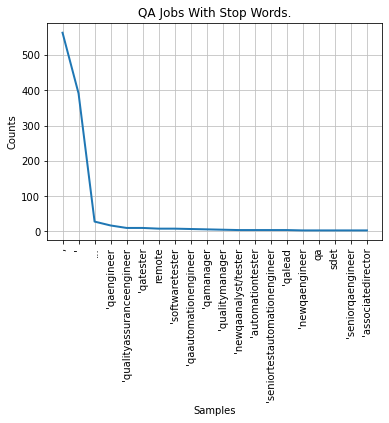

<AxesSubplot:title={'center':'QA Jobs With Stop Words.'}, xlabel='Samples', ylabel='Counts'>

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

sentence = modified_job_titles_data.lower()
tokens = nltk.tokenize.word_tokenize(sentence)

# creating a list without stop words 
filtered = [word for word in tokens if not word in stopwords.words()]
# print(filtered)

# Plotting data, with stop words 
import matplotlib.pyplot as plt

fd_stopwords = nltk.FreqDist(tokens)
fd_stopwords.plot(20, cumulative=False, title="QA Jobs With Stop Words.")

# Plotting data without stop words 
# The two graphs are commented out as -- spoiler alert -- they are identical to the above

# fd_no_stopwords = nltk.FreqDist(filtered) 
# fd_no_stopwords.plot(20, cumulative=False, title="QA Jobs With No Stop Words.")

#### Advantages and Drawbacks to Plotting <a id="draw_back_plotting"></a>

The advantages of the plotting method is that the data is presented in an easy to read format, highlighting the frequency of job titles in a way that is easy to comprehend. The fact that the graph contains a numerical representation of how often certain words appear is useful for further analysis. 

Despite that; however, some garbage words have made it into the graph which make it appear a bit strange. While this is due to the data set and its imperfect state, this does showcase how important data cleaning is in order to avoid problems of such a nature. 

#### Job Titles as a WordCloud <a id="wordcloud"></a>

The cell below displays job titles as a word cloud, which was generated using the WordCloud library.

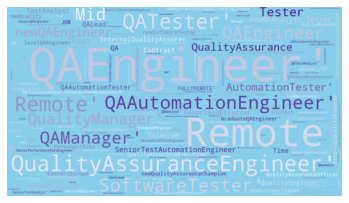

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# generating the word cloud, with some specific properties 
wordcloud = WordCloud(width=850, height=480, background_color="skyblue", colormap="Purples").generate(modified_job_titles_data)
    
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### Advantages and Drawbacks to the Word Cloud <a id="draw_back_word_cloud"></a>

One of the advantages to the word cloud is that it presents information in a manner that is very aesthetic and – consequently – pleasing to the eye. It is also nice how the word cloud can be customised to one’s taste. 

However, the disadvantage of the word cloud is that it merely showcases the frequency of words by depicting its size in a visual fashion and not via a count. This makes the word cloud more useful for illustrative purposes rather than an  in-depth analysis. 

#### Most Frequent Job Titles Calculated Using the Counter Class <a id="counter_class"></a>

The method below showcases how to get the most frequent job titles using the counter library.

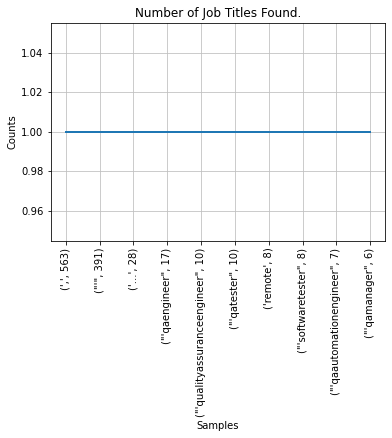

<AxesSubplot:title={'center':'Number of Job Titles Found.'}, xlabel='Samples', ylabel='Counts'>

In [20]:
from collections import Counter

# Count the frequencies using the Counter method 
frequencies = Counter(tokens)
ten_most_frequent = frequencies.most_common(10)

# print(ten_most_frequent)

# plot a frequency graph 
job_titles_freq = nltk.FreqDist(ten_most_frequent)
job_titles_freq.plot(len(ten_most_frequent), cumulative=False, title="Number of Job Titles Found.")

#### Advantages and Drawbacks to the Counting Library <a id="draw_back_word_count"></a>

The advantage of using the counting library is that it comes with a count value that states exactly how often a certain word occurs. This is more precise than the previous methods used, because it gives a good starting point for further analysis. Moreover, it can be combined with the plotting method used before, which provides visual as well as numerical information. 

One of the obvious drawbacks is that rubbish data has been collected again due to the flawed execution of the cleaning on the data set. 

#### Conclusions Drawn from the NLP Analysis <a id="nlp_conclusions"></a>  

Some of the tentative conclusions from the NLP analysis – despite the existence of garbage words - are: 

<ul>
<p> <li>The words ‘QA’, ‘software tester’,  ‘engineer’  and ‘quality’ could be seen as interchangeable, considering the frequency with which they pop up. </li> </p> 
    
<p> <li>The fact that the words ‘automation’ and ‘sdet’ (Software Development Engineer in Test) are among the most frequent in showing up suggests that test automation is popular and most definitely a sought after skill. </li> </p>
    
<p> <li> The occurrence of words such as ‘manager’, ‘lead’ and ‘senior’ suggests that software testers with a lot of experience are sought after by employers / recruiters. </li> </p> 
   
</ul>

### Plotting the Frequency of Skills and Programming Languages <a id="programming_lang_and_skills"></a>

This section deals with analysing the frequency of certain skills and programming languages found within the existing job titles data set. 

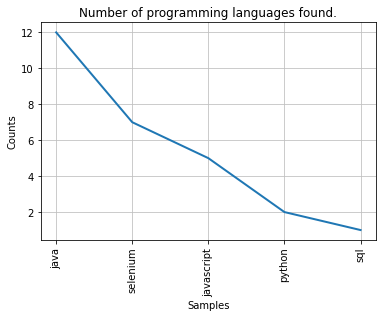

<AxesSubplot:title={'center':'Number of programming languages found.'}, xlabel='Samples', ylabel='Counts'>

In [23]:
# function that checks whether a token contains a given programming language 
def find_programming_languages(tokens: List) -> List:
    
    # list containing programming languages 
    programming_languages = ['selenium', 'java', 'c#', 'python', 
                             'c++', 'ruby', 'javascript', 'sql']
    
    # empty found languages list 
    found_languages = []
    
    # check whether token is equal to or contains one 
    # of the programming languages above
    for token in tokens:
        for language in programming_languages:
            if token.lower() == language or language in token.lower():
                
                # if token contains or is equal to a programming language, append it to the 
                # empty found languages list 
                found_languages.append(language)
                
    return found_languages 

languages_contained = find_programming_languages(tokens)

# plot a frequency graph 
number_of_programming_languages = nltk.FreqDist(languages_contained)
number_of_programming_languages.plot(len(number_of_programming_languages), cumulative=False, title="Number of programming languages found.")

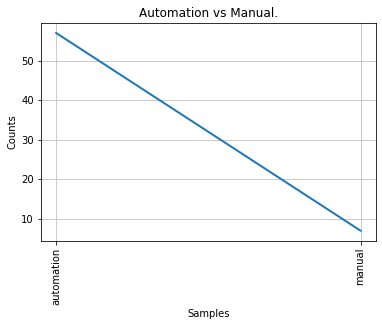

<AxesSubplot:title={'center':'Automation vs Manual.'}, xlabel='Samples', ylabel='Counts'>

In [29]:
# function that checks whether a token contains a certain skill
def find_freq_of_automation(tokens: List) -> List:
    
    # list containing QA skills
    skills = ['automation', 'manual', 'regression', 'code']
    
    # empty found skills list 
    found_skills = []
    
    # check whether token is equal to or contains one 
    # of the programming languages above
    for token in tokens:
        for skill in skills:
            if token.lower() == skill or skill in token.lower():
                
                # if token contains or is equal to a programming language, append it to the 
                # empty found languages list 
                found_skills.append(skill)
                
    return found_skills 

skills_within_titles = find_freq_of_automation(tokens)

# plot a frequency graph 
number_of_skills_in_titles = nltk.FreqDist(skills_within_titles)
number_of_skills_in_titles.plot(len(number_of_skills_in_titles), cumulative=False, title="Automation vs Manual.")